In [4]:
import tensorflow as tf

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [5]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train.shape = ', x_train.shape, ' , x_test.shape = ', x_test.shape)
print('t_train.shape = ', t_train.shape, ' , t_test.shape = ', t_test.shape)

x_train.shape =  (60000, 28, 28)  , x_test.shape =  (10000, 28, 28)
t_train.shape =  (60000,)  , t_test.shape =  (10000,)


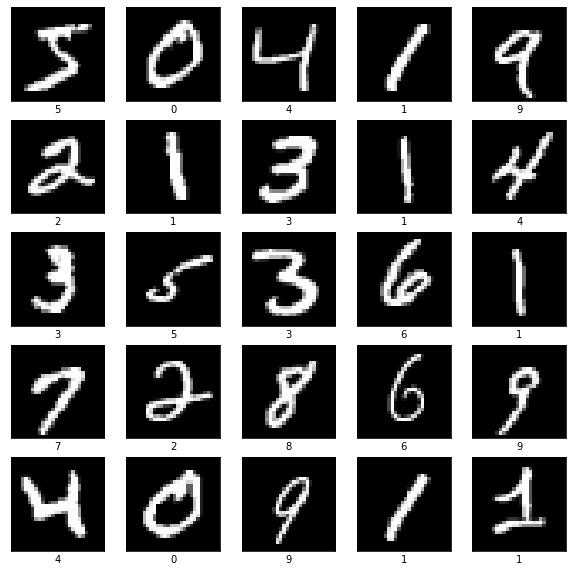

In [3]:
# 데이터 출력

plt.figure(figsize=(10,10))

for index in range(25):

    plt.subplot(5, 5, index+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(t_train[index]))

plt.show()

In [26]:
# sequential model construction

model = Sequential()

model.add(Conv2D(input_shape=(28,28,1), kernel_size=5, filters=32, strides=(1,1), activation='relu', use_bias=True, padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(0.25))

model.add(Conv2D(kernel_size=5, filters=64, strides=(1,1), activation='relu', use_bias=True, padding='SAME'))
model.add(MaxPooling2D(pool_size=(2,2), padding='SAME'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [27]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)             

In [29]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [30]:
start_time = datetime.now()

hist = model.fit(x_train, t_train, batch_size=50, epochs=50, validation_data=(x_test, t_test))

end_time = datetime.now()

print('\n\nElapsed Time => ', end_time - start_time)

Epoch 1/50
1200/1200 [==============================] - 5s 3ms/step - loss: 0.1679 - accuracy: 0.9491 - val_loss: 0.0470 - val_accuracy: 0.9843
Epoch 2/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0563 - accuracy: 0.9827 - val_loss: 0.0316 - val_accuracy: 0.9901
Epoch 3/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0411 - accuracy: 0.9871 - val_loss: 0.0283 - val_accuracy: 0.9908
Epoch 4/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0349 - accuracy: 0.9887 - val_loss: 0.0273 - val_accuracy: 0.9922
Epoch 5/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0294 - accuracy: 0.9904 - val_loss: 0.0258 - val_accuracy: 0.9919
Epoch 6/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0255 - accuracy: 0.9915 - val_loss: 0.0272 - val_accuracy: 0.9911
Epoch 7/50
1200/1200 [==============================] - 4s 3ms/step - loss: 0.0226 - accuracy: 0.9924 - val_loss: 0.0231 - val_accuracy:

In [31]:
# x_test 도 마찬가지로 데이터를 4차원으로 reshape 으로 변환 해주지 않으면 error

model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0378 - accuracy: 0.9933


[0.037767816334962845, 0.9933000206947327]

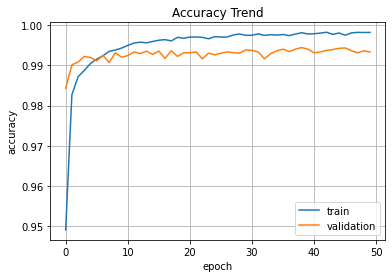

In [32]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

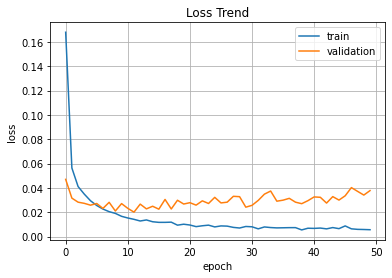

In [33]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()